In [1]:
# import numpy, pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# First we process the raw data into a new file format that can be read easily by pandas
f = open("SigmaGammaGamma_PDG_raw.txt", "r")
new_f = open("SigmaGammaGamma_PDG_new_raw.txt", "w")
string = f.readline()
while string != '':
    line_list = string.split()
    ref_list = line_list[9:]
    line_list = line_list[:9]
    new_line = '\t'.join(line_list)
    ref_string = " ".join(ref_list)
    new_f.write(new_line+'\t' + ref_string + '\n')
    string = f.readline()
f.close()
new_f.close()

In [3]:
# Read the new data file
# Define a pLab threshold for the data
ECM_MIN = 0
ECM_MAX = 1000
exp_data_raw = pd.read_csv("SigmaGammaGamma_PDG_new_raw.txt", sep = '\t')
condition = (exp_data_raw["ECM(GEV)"] > ECM_MIN) & (exp_data_raw["ECM(GEV)"] < ECM_MAX)
# Read ECM values as well their minimum and maximum values
sqrtS_vals = np.array(exp_data_raw[condition]["ECM(GEV)"])
sqrtS_min_vals = np.array(exp_data_raw[condition]["ECM_MIN"])
sqrtS_max_vals = np.array(exp_data_raw[condition]["ECM_MAX"])
sqrtS_err_plus = sqrtS_max_vals - sqrtS_vals
sqrtS_err_minus = sqrtS_vals - sqrtS_min_vals
# Read cross-section values
sigma_vals = np.array(exp_data_raw[condition]["SIG(MB)"])*10**6
# Compute the uncertainty of each point
stat_error_plus = np.array(exp_data_raw[condition]["STA_ERR+"])*10**6
stat_error_minus = np.array(exp_data_raw[condition]["STA_ERR-"])*10**6
# Compute the statistical error as the average
stat_error = 0.5 * (stat_error_plus + stat_error_minus)
# Systematic errors come in percentage
syst_error_plus = sigma_vals * np.array(exp_data_raw[condition]["SY_ER+(PCT)"]) / 100.0
syst_error_minus = sigma_vals * np.array(exp_data_raw[condition]["SY_ER-(PCT)"]) / 100.0
# Compute the systematic error as the average
syst_error = 0.5 * (syst_error_plus + syst_error_minus)
# Compute the total error as sqrt(stat_error**2 + syst_error**2)
error_vals = np.sqrt(stat_error**2 + syst_error**2)
# Create new data frame with columns ["sqrtS", "sqrtSErrorPlus", "sqrtSErrorMinus", "sigma", "Errorp", "Errorm"]
exp_data = pd.DataFrame({"W(GeV)":sqrtS_vals, "WErrorp":sqrtS_err_plus, "WErrorm":sqrtS_err_minus,
                        "sigma(nb)":sigma_vals, "Errorp":error_vals, "Errorm": error_vals})
exp_data.to_csv("SigmaGammaGamma_PDG_data.txt", sep ='\t', index = False)

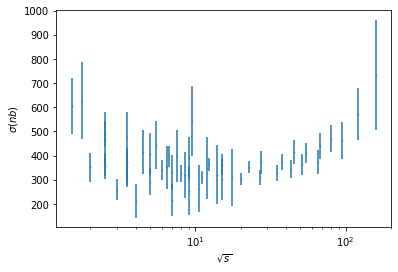

In [4]:
plt.errorbar(sqrtS_vals, sigma_vals, error_vals, fmt='o', markersize=0.5)
plt.xlabel(r'$\sqrt{s}$')
plt.ylabel(r'$\sigma(nb)$')
#plt.xlim(1,10**6)
plt.xscale("log")